Finance 5350, Fall 2019
<br>
Project 2 Description
<br>
<br>
This example is taken from Chapter 4 of the bookImplementing Derivatives Models by Clewlow and Strickland.  In this project you will price a European call option with the current asset price at 100 and volatility of 20 per cent. The continuously compounded interest rate is assumed to be 6 per cent perannum, the asset pays a continuous dividend yield of 3 per cent per annum.

The simulation has 52 time steps and 10,000 simulations; K= 100,T= 1 year,S= 100,σ= 0.2,r= 0.06,δ= 0.03 N= 52, and M= 10,000. Please report the estimated price and standard error for a Naive Monte Carlo method,  an  Antithetic  Monte  Carlo  method,  a  Black-Scholes-based  Delta control  variate  Monte  Carlo  method  combined  with  Antithetic  sampling, and finally for Black-Scholes Delta and Gamma control variates combined with Antithetic sampling.  

Create a table in your final report to present and discuss the results.  What do you conclude about efficiency in pricing the option with these various variance reduction methods?

In [1]:
import numpy as np
import pandas as pd
from option import VanillaOption, call_payoff, put_payoff
from pricers import naive_monte_carlo_pricer, antithetic_monte_carlo_pricer, black_scholes_delta_anti_control_pricer, black_scholes_delta_gamma_anti_control_pricer

In [9]:
spot = 100
strike = 100
expiry = 1
vol = 0.20
rate = 0.06
div = 0.03
steps = 52
reps = 10000

In [10]:
final_table = {}
final_table['Type of Monte Carlo'] = []
final_table['Price'] = []
final_table['Stderr'] = []

### Naive Monte Carlo

In [11]:
the_call = VanillaOption(strike, expiry, call_payoff)
monte_call = naive_monte_carlo_pricer(the_call, spot, rate, vol, div, reps, steps=1)
    
final_table['Type of Monte Carlo'].append('Naive')
final_table['Price'].append(monte_call.price)
final_table['Stderr'].append(monte_call.stderr)

### Antithetic Monte Carlo

In [12]:
the_call = VanillaOption(strike, expiry, call_payoff)
anti_call = antithetic_monte_carlo_pricer(the_call, spot, rate, vol, div, reps, steps)
    
final_table['Type of Monte Carlo'].append('Antithetic')
final_table['Price'].append(anti_call.price)
final_table['Stderr'].append(anti_call.stderr)

### Black Scholes with Delta Based Variante Control

In [13]:
the_call = VanillaOption(strike, expiry, call_payoff)
black_delta_anti_call = black_scholes_delta_anti_control_pricer(the_call, spot, rate, vol, div, reps, steps)
    
final_table['Type of Monte Carlo'].append('Black-Scholes-Based/Delta/Antithetic')
final_table['Price'].append(black_delta_anti_call.price)
final_table['Stderr'].append(black_delta_anti_call.stderr)

### Black Scholes with Delta and Gamma Based Variante Controls

In [14]:
the_call = VanillaOption(strike, expiry, call_payoff)
black_delta_gamma_anti_call = black_scholes_delta_gamma_anti_control_pricer(the_call, spot, rate, vol, div, reps, steps)
    
final_table['Type of Monte Carlo'].append('Black-Scholes-Based/Delta + Gamma/Antithetic')
final_table['Price'].append(black_delta_gamma_anti_call.price)
final_table['Stderr'].append(black_delta_gamma_anti_call.stderr)

In [16]:
final = pd.DataFrame(final_table)
final

,Type of Monte Carlo,Price,Stderr
0,Naive,9.425430,0.145815
1,Antithetic,9.244461,0.072533
2,Black-Scholes-Based/Delta/Antithetic,9.137203,0.019639
3,Black-Scholes-Based/Delta + Gamma/Antithetic,9.135356,0.004811




 As shown in the graph below, there is a major reduction in variance when using control variantes such as the Black Scholes based delta and gamma. As mentioned in the text -- this example reduces the total standard error by a factor of 90. In order to achevie this same level of variance reduction using the Naive Monte Carlo method it would require increasing the number of simulations by a factor of 8100, that would be 8.1 million simulations with a computation time of approximately 3.15 hours.Therefore, the application of these control variantes saves computational costs and time.




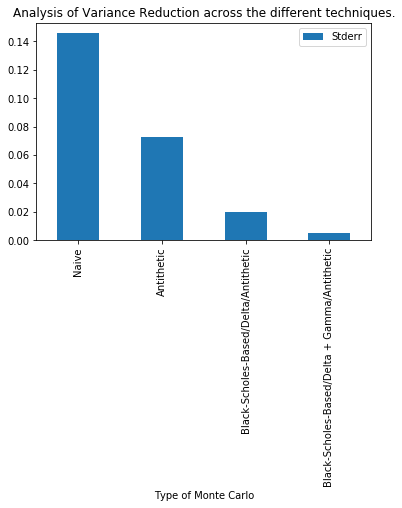

In [19]:
final.plot('Type of Monte Carlo', 'Stderr', kind = 'Bar', title = "Analysis of Variance Reduction across the different techniques.")
print('\n')
print('As shown in the graph below, there is a major reduction in variance when using control variantes such as the Black Scholes based delta and gamma. As mentioned in the text -- this example reduces the total standard error by a factor of 90. In order to achevie this same level of variance reduction using the Naive Monte Carlo method it would require increasing the number of simulations by a factor of 8100, that would be 8.1 million simulations with a computation time of approximately 3.15 hours.Therefore, the application of these control variantes saves computational costs and time.')
print('\n')